**Recurrent Neural Networks**

# Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "rnn"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

Then of course we will need TensorFlow:

In [2]:
import tensorflow as tf

In [3]:
man = np.array([1, 0.5, 0.5])
king = np.array([1, 2, 10])
man_u = man/np.sqrt(sum(man*man))
king_u = king/np.sqrt(sum(king*king))
man_u.dot(king_u)

0.5577733510227172

NLTK:
https://www.nltk.org/ (Grammar, (NER - Named Entity Extraction))

http://textblob.readthedocs.io/en/dev/ (Simiplified NLTK)

https://spacy.io/ 

https://nlp.stanford.edu/ (General Purpose - Large Project)



# Basic RNNs

## Manual RNN

In [4]:
# Manual RNN model
# RNN is composed of a layer of five recurrent neurons using the tanh activation function
# Assume that the RNN runs over only two time steps and taking input vectors of size 3 at each time step

reset_graph()

n_inputs = 3
n_neurons = 5

X0 = tf.placeholder(tf.float32, [None, n_inputs])
X1 = tf.placeholder(tf.float32, [None, n_inputs])

Wx = tf.Variable(tf.random_normal(shape=[n_inputs, n_neurons],dtype=tf.float32))
Wy = tf.Variable(tf.random_normal(shape=[n_neurons,n_neurons],dtype=tf.float32))
b = tf.Variable(tf.zeros([1, n_neurons], dtype=tf.float32))

Y0 = tf.tanh(tf.matmul(X0, Wx) + b)
Y1 = tf.tanh(tf.matmul(Y0, Wy) + tf.matmul(X1, Wx) + b)

init = tf.global_variables_initializer()

In [5]:
# Run the model
# we need to feed it the inputs at both time steps
# mini-batch contains four instances, each with an input sequence composed of exactly two inputs
# Y0_val and Y1_val contain the outputs of the network at both time steps for all neurons and all instances in the mini-batch

import numpy as np

X0_batch = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 0, 1]]) # t = 0
X1_batch = np.array([[9, 8, 7], [0, 0, 0], [6, 5, 4], [3, 2, 1]]) # t = 1

with tf.Session() as sess:
    init.run()
    Y0_val, Y1_val = sess.run([Y0, Y1], feed_dict={X0: X0_batch, X1: X1_batch})

In [6]:
print(Y0_val)

[[-0.0664006   0.9625767   0.68105793  0.7091854  -0.898216  ]
 [ 0.9977755  -0.71978897 -0.9965761   0.9673924  -0.9998972 ]
 [ 0.99999774 -0.99898803 -0.9999989   0.9967762  -0.9999999 ]
 [ 1.         -1.         -1.         -0.99818915  0.9995087 ]]


In [7]:
print(Y1_val)

[[ 1.         -1.         -1.          0.40200275 -0.9999998 ]
 [-0.12210423  0.6280527   0.9671843  -0.9937122  -0.25839362]
 [ 0.9999983  -0.9999994  -0.9999975  -0.8594331  -0.9999881 ]
 [ 0.99928284 -0.99999803 -0.9999058   0.9857963  -0.92205757]]


## Using `static_rnn()`

In [8]:
# Let’s look at how to create the same model using TensorFlow’s RNN operations

n_inputs = 3
n_neurons = 5

In [9]:
reset_graph()

X0 = tf.placeholder(tf.float32, [None, n_inputs])
X1 = tf.placeholder(tf.float32, [None, n_inputs])

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
output_seqs, states = tf.contrib.rnn.static_rnn(basic_cell, [X0, X1],
                                                dtype=tf.float32)
Y0, Y1 = output_seqs

W0528 13:43:50.638516 140035565999936 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0528 13:43:50.639892 140035565999936 deprecation.py:323] From <ipython-input-9-75d973663c33>:6: BasicRNNCell.__init__ (from tensorflow.python.ops.rnn_cell_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.
W0528 13:43:50.641781 140035565999936 deprecation.py:323] From <ipython-input-9-75d973663c33>:8: static_rnn (from tensorflow.python.ops.rnn) is deprecated and will be removed in a future version.
Instructions for updating:
Plea

In [10]:
init = tf.global_variables_initializer()

In [11]:
X0_batch = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 0, 1]])
X1_batch = np.array([[9, 8, 7], [0, 0, 0], [6, 5, 4], [3, 2, 1]])

with tf.Session() as sess:
    init.run()
    Y0_val, Y1_val, states_val = sess.run([Y0, Y1, states], feed_dict={X0: X0_batch, X1: X1_batch})

In [12]:
Y0_val

array([[ 0.30741334, -0.32884315, -0.6542847 , -0.9385059 ,  0.52089024],
       [ 0.99122757, -0.9542541 , -0.7518079 , -0.9995208 ,  0.9820235 ],
       [ 0.9999268 , -0.99783254, -0.8247353 , -0.9999963 ,  0.99947774],
       [ 0.996771  , -0.68750614,  0.8419969 ,  0.9303911 ,  0.8120684 ]],
      dtype=float32)

In [13]:
Y1_val

array([[ 0.99998885, -0.99976057, -0.06679279, -0.9999803 ,  0.99982214],
       [-0.65249425, -0.51520866, -0.37968954, -0.5922594 , -0.08968391],
       [ 0.998624  , -0.99715203, -0.03308626, -0.9991566 ,  0.9932902 ],
       [ 0.99681675, -0.9598194 ,  0.39660627, -0.8307606 ,  0.79671973]],
      dtype=float32)

In [14]:
states_val

array([[ 0.99998885, -0.99976057, -0.06679279, -0.9999803 ,  0.99982214],
       [-0.65249425, -0.51520866, -0.37968954, -0.5922594 , -0.08968391],
       [ 0.998624  , -0.99715203, -0.03308626, -0.9991566 ,  0.9932902 ],
       [ 0.99681675, -0.9598194 ,  0.39660627, -0.8307606 ,  0.79671973]],
      dtype=float32)

In [15]:
np.all(states_val == Y1_val)

True

In [16]:
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "b<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [17]:
show_graph(tf.get_default_graph())

## Packing sequences

In [18]:
reset_graph()
x = tf.constant([
    [1, 2, 2],
    [3, 4, 4],
    [23, 24, 24],
    [13, 14, 14],
    ])

v = tf.transpose(x, perm=[1, 0])
vv = tf.unstack(v)
with tf.Session() as s:
    print(s.run(v)) # 2 x 4 x 3
    print("------")
    print(s.run(vv))

[[ 1  3 23 13]
 [ 2  4 24 14]
 [ 2  4 24 14]]
------
[array([ 1,  3, 23, 13], dtype=int32), array([ 2,  4, 24, 14], dtype=int32), array([ 2,  4, 24, 14], dtype=int32)]


In [19]:
ARR = [
        # t = 0      t = 1 
        [
            [0, 1, 2], 
            [9, 8, 7]
        ], # instance 1
        [
            [3, 4, 5], 
            [0, 0, 0]
        ], # instance 2
        [
            [6, 7, 8], 
            [6, 5, 4]
        ], # instance 3
        [
            [9, 0, 1], 
            [3, 2, 1]
        ], # instance 4
    ]

In [20]:
print(ARR[0][0][0], ARR[0][0][1], ARR[0][0][2])
print(ARR[0][0][0], ARR[1][0][0], ARR[2][0][0])

0 1 2
0 3 6


In [21]:
ARR_N = np.transpose(ARR, (2, 0, 1))
ARR_N

array([[[0, 9],
        [3, 0],
        [6, 6],
        [9, 3]],

       [[1, 8],
        [4, 0],
        [7, 5],
        [0, 2]],

       [[2, 7],
        [5, 0],
        [8, 4],
        [1, 1]]])

In [23]:
#print(ARR_N[0][0][0], ARR_N[0][0][1], ARR_N[0][0][2])
print(ARR_N[0][0][0], ARR_N[1][0][0], ARR_N[2][0][0])

0 1 2


In [24]:
a = [
        [1, 2],
        [3, 4]
]
a_T = [
        [1, 3],
        [2, 4]
]


In [25]:
print(a[0][1], a_T[1][0])

2 2


In [26]:
# Understanding transpose and unstack
# Dimension: 4 x 2 x 3
# Dimension: no_of_instances x no of steps x no of features

x = tf.constant(
    [
        # t = 0      t = 1 
        [
            [0, 1, 2], 
            [9, 8, 7]
        ], # instance 1
        [
            [3, 4, 5], 
            [0, 0, 0]
        ], # instance 2
        [
            [6, 7, 8], 
            [6, 5, 4]
        ], # instance 3
        [
            [9, 0, 1], 
            [3, 2, 1]
        ], # instance 4
    ]
) # 4 x 2 x 3 - 0, 1, 2 => 2, 1, 0
v = tf.transpose(x, perm=[2, 1, 0])
vv = tf.unstack(v)
with tf.Session() as s:
    print(s.run(v)) # 2 x 4 x 3
    print("------")
    print(s.run(vv))

[[[0 3 6 9]
  [9 0 6 3]]

 [[1 4 7 0]
  [8 0 5 2]]

 [[2 5 8 1]
  [7 0 4 1]]]
------
[array([[0, 3, 6, 9],
       [9, 0, 6, 3]], dtype=int32), array([[1, 4, 7, 0],
       [8, 0, 5, 2]], dtype=int32), array([[2, 5, 8, 1],
       [7, 0, 4, 1]], dtype=int32)]


In [27]:
n_steps = 2
n_inputs = 3
n_neurons = 5

In [28]:
reset_graph()

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
X_seqs = tf.unstack(tf.transpose(X, perm=[1, 0, 2]))

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
output_seqs, states = tf.contrib.rnn.static_rnn(basic_cell, X_seqs,
                                                dtype=tf.float32)
outputs = tf.transpose(tf.stack(output_seqs), perm=[1, 0, 2])

In [29]:
init = tf.global_variables_initializer()

In [30]:
X_batch = np.array([
        # t = 0      t = 1 
        [[0, 1, 2], [9, 8, 7]], # instance 1
        [[3, 4, 5], [0, 0, 0]], # instance 2
        [[6, 7, 8], [6, 5, 4]], # instance 3
        [[9, 0, 1], [3, 2, 1]], # instance 4
    ])
with tf.Session() as sess:
    init.run()
    outputs_val = outputs.eval(feed_dict={X: X_batch})

In [31]:
print(outputs_val)

[[[-0.45652324 -0.68064123  0.40938237  0.63104504 -0.45732826]
  [-0.9428799  -0.9998869   0.94055814  0.9999985  -0.9999999 ]]

 [[-0.8001535  -0.9921827   0.7817797   0.9971031  -0.9964609 ]
  [-0.637116    0.11300932  0.5798437   0.43105596 -0.63716984]]

 [[-0.93605185 -0.9998379   0.9308867   0.9999815  -0.99998295]
  [-0.9165386  -0.9945604   0.896054    0.99987185 -0.9999751 ]]

 [[ 0.9927369  -0.9981933  -0.55543643  0.9989031  -0.9953323 ]
  [-0.02746338 -0.73191977  0.7827872   0.9525682  -0.9781773 ]]]


In [32]:
print(np.transpose(outputs_val, axes=[1, 0, 2])[1])

[[-0.9428799  -0.9998869   0.94055814  0.9999985  -0.9999999 ]
 [-0.637116    0.11300932  0.5798437   0.43105596 -0.63716984]
 [-0.9165386  -0.9945604   0.896054    0.99987185 -0.9999751 ]
 [-0.02746338 -0.73191977  0.7827872   0.9525682  -0.9781773 ]]


## Using `dynamic_rnn()`

In [33]:
n_steps = 2
n_inputs = 3
n_neurons = 5

In [34]:
reset_graph()

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

W0528 13:45:08.021010 140035565999936 deprecation.py:323] From <ipython-input-34-be3cdb08b820>:6: dynamic_rnn (from tensorflow.python.ops.rnn) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API


In [35]:
init = tf.global_variables_initializer()

In [36]:
X_batch = np.array([
        [[0, 1, 2], [9, 8, 7]], # instance 1
        [[3, 4, 5], [0, 0, 0]], # instance 2
        [[6, 7, 8], [6, 5, 4]], # instance 3
        [[9, 0, 1], [3, 2, 1]], # instance 4
    ])

with tf.Session() as sess:
    init.run()
    outputs_val = outputs.eval(feed_dict={X: X_batch})

In [37]:
print(outputs_val)

[[[-0.85115266  0.87358344  0.5802911   0.8954789  -0.0557505 ]
  [-0.9999959   0.99999577  0.9981815   1.          0.37679607]]

 [[-0.9983293   0.9992038   0.98071456  0.999985    0.25192663]
  [-0.7081804  -0.0772338  -0.8522789   0.5845349  -0.7878095 ]]

 [[-0.9999827   0.99999535  0.9992863   1.          0.5159072 ]
  [-0.9993956   0.9984095   0.83422637  0.9999999  -0.47325212]]

 [[ 0.87888587  0.07356028  0.97216916  0.9998546  -0.7351168 ]
  [-0.9134514   0.36009568  0.7624866   0.99817705  0.80142003]]]


In [38]:
show_graph(tf.get_default_graph())

## Setting the sequence lengths

In [39]:
n_steps = 2
n_inputs = 3
n_neurons = 5

reset_graph()

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)

In [40]:
seq_length = tf.placeholder(tf.int32, [None])
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32,
                                    sequence_length=seq_length)

W0528 13:45:08.697425 140035565999936 deprecation.py:323] From /usr/local/anaconda/lib/python3.6/site-packages/tensorflow/python/ops/rnn.py:244: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [41]:
init = tf.global_variables_initializer()

In [42]:
X_batch = np.array([
        # step 0     step 1
        [[0, 1, 2], [9, 8, 7]], # instance 1
        [[3, 4, 5], [0, 0, 0]], # instance 2 (padded with zero vectors)
        [[6, 7, 8], [6, 5, 4]], # instance 3
        [[9, 0, 1], [3, 2, 1]], # instance 4
    ])
seq_length_batch = np.array([2, 1, 2, 2])

In [43]:
with tf.Session() as sess:
    init.run()
    outputs_val, states_val = sess.run(
        [outputs, states], feed_dict={X: X_batch, seq_length: seq_length_batch})

In [44]:
print(outputs_val)

[[[-0.9123188   0.16516446  0.5548655  -0.39159346  0.20846416]
  [-1.          0.9567258   0.9983168   0.99970174  0.9651857 ]]

 [[-0.9998612   0.6702291   0.9723653   0.6631046   0.74457586]
  [ 0.          0.          0.          0.          0.        ]]

 [[-0.99999976  0.8967997   0.9986295   0.9647514   0.93662   ]
  [-0.9999526   0.9681953   0.96002865  0.98706263  0.85459226]]

 [[-0.96435434  0.99501586 -0.36150697  0.9983378   0.999497  ]
  [-0.96135855  0.9568762   0.7132288   0.97729224 -0.0958299 ]]]


In [45]:
print(states_val)

[[-1.          0.9567258   0.9983168   0.99970174  0.9651857 ]
 [-0.9998612   0.6702291   0.9723653   0.6631046   0.74457586]
 [-0.9999526   0.9681953   0.96002865  0.98706263  0.85459226]
 [-0.96135855  0.9568762   0.7132288   0.97729224 -0.0958299 ]]


## Training a sequence classifier

In [46]:
reset_graph()

n_steps = 28
n_inputs = 28
n_neurons = 150
n_outputs = 10

learning_rate = 0.001

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

logits = tf.layers.dense(states, n_outputs)
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                          logits=logits)
loss = tf.reduce_mean(xentropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()

W0528 13:45:09.156188 140035565999936 deprecation.py:323] From <ipython-input-46-586b9fd18d49>:16: dense (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.dense instead.


In [47]:
np.reshape?

In [48]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("data/mnist/")
X_test = mnist.test.images.reshape((-1, n_steps, n_inputs))
y_test = mnist.test.labels

W0528 13:45:09.707427 140035565999936 deprecation.py:323] From <ipython-input-48-7a74bc6cc70f>:2: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0528 13:45:09.708285 140035565999936 deprecation.py:323] From /usr/local/anaconda/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0528 13:45:09.709573 140035565999936 deprecation.py:323] From /usr/local/anaconda/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future v

Extracting data/mnist/train-images-idx3-ubyte.gz


W0528 13:45:10.066897 140035565999936 deprecation.py:323] From /usr/local/anaconda/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0528 13:45:10.137488 140035565999936 deprecation.py:323] From /usr/local/anaconda/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Extracting data/mnist/train-labels-idx1-ubyte.gz
Extracting data/mnist/t10k-images-idx3-ubyte.gz
Extracting data/mnist/t10k-labels-idx1-ubyte.gz


In [49]:
batch_size = 2
X_batch, y_batch = mnist.train.next_batch(batch_size)


In [50]:
X_batch

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [51]:
y_batch

array([8, 5], dtype=uint8)

In [52]:
X_batch_reshaped = X_batch.reshape((-1, n_steps, n_inputs))

In [53]:
X_batch_reshaped

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)

In [54]:
arr = np.array([1,2,3,4,5,6,7,8,9,10, 11, 12])
arr.reshape(-1, 3)

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [55]:
n_epochs = 20
batch_size = 150

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            X_batch = X_batch.reshape((-1, n_steps, n_inputs))
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

0 Train accuracy: 0.9533333 Test accuracy: 0.9293
1 Train accuracy: 0.96666664 Test accuracy: 0.9446
2 Train accuracy: 0.94666666 Test accuracy: 0.9543
3 Train accuracy: 0.96666664 Test accuracy: 0.9567
4 Train accuracy: 0.96 Test accuracy: 0.9624
5 Train accuracy: 0.98 Test accuracy: 0.9685
6 Train accuracy: 0.97333336 Test accuracy: 0.9725
7 Train accuracy: 0.9866667 Test accuracy: 0.9715
8 Train accuracy: 0.9533333 Test accuracy: 0.9661
9 Train accuracy: 0.97333336 Test accuracy: 0.9678
10 Train accuracy: 0.99333334 Test accuracy: 0.976
11 Train accuracy: 0.96 Test accuracy: 0.97
12 Train accuracy: 0.9866667 Test accuracy: 0.9746
13 Train accuracy: 0.9866667 Test accuracy: 0.9703
14 Train accuracy: 0.98 Test accuracy: 0.9718
15 Train accuracy: 0.99333334 Test accuracy: 0.9716
16 Train accuracy: 0.99333334 Test accuracy: 0.9706
17 Train accuracy: 0.9866667 Test accuracy: 0.9684
18 Train accuracy: 0.98 Test accuracy: 0.9725
19 Train accuracy: 1.0 Test accuracy: 0.9736


# Multi-layer RNN

In [56]:
reset_graph()

n_steps = 28
n_inputs = 28
n_outputs = 10

learning_rate = 0.001

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])

In [57]:
n_neurons = 100
n_layers = 3

layers = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons,
                                      activation=tf.nn.relu)
          for layer in range(n_layers)]
multi_layer_cell = tf.contrib.rnn.MultiRNNCell(layers)
outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

W0528 13:47:31.302050 140035565999936 deprecation.py:323] From <ipython-input-57-c219899e0f6e>:7: MultiRNNCell.__init__ (from tensorflow.python.ops.rnn_cell_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.


In [58]:
states_concat = tf.concat(axis=1, values=states)
logits = tf.layers.dense(states_concat, n_outputs)
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()

In [59]:
n_epochs = 10
batch_size = 150

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            X_batch = X_batch.reshape((-1, n_steps, n_inputs))
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

0 Train accuracy: 0.94666666 Test accuracy: 0.9441
1 Train accuracy: 0.9533333 Test accuracy: 0.9615
2 Train accuracy: 0.98 Test accuracy: 0.9679
3 Train accuracy: 0.98 Test accuracy: 0.9664
4 Train accuracy: 0.98 Test accuracy: 0.9736
5 Train accuracy: 0.9866667 Test accuracy: 0.9752
6 Train accuracy: 0.98 Test accuracy: 0.9773
7 Train accuracy: 0.99333334 Test accuracy: 0.9808
8 Train accuracy: 0.98 Test accuracy: 0.9794
9 Train accuracy: 0.97333336 Test accuracy: 0.9843


# Time series

In [60]:
t_min, t_max = 0, 30
resolution = 0.1

def time_series(t):
    return t * np.sin(t) / 3 + 2 * np.sin(t*5) + np.random.random(1)[0]/2

def next_batch(batch_size, n_steps):
    t0 = np.random.rand(batch_size, 1) * (t_max - t_min - n_steps * resolution)
    Ts = t0 + np.arange(0., n_steps + 1) * resolution
    ys = time_series(Ts)
    return ys[:, :-1].reshape(-1, n_steps, 1), ys[:, 1:].reshape(-1, n_steps, 1)

In [61]:
time_series(10)

-2.2915170084476237

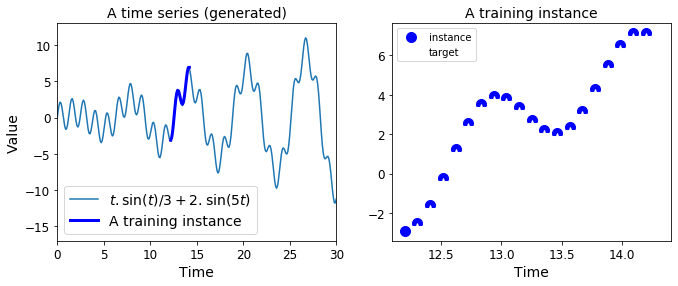

In [62]:
t = np.linspace(t_min, t_max, int((t_max - t_min) / resolution))

n_steps = 20
t_instance = np.linspace(12.2, 12.2 + resolution * (n_steps + 1), n_steps + 1)

plt.figure(figsize=(11,4))
plt.subplot(121)
plt.title("A time series (generated)", fontsize=14)
plt.plot(t, time_series(t), label=r"$t . \sin(t) / 3 + 2 . \sin(5t)$")
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "b-", linewidth=3, label="A training instance")
plt.legend(loc="lower left", fontsize=14)
plt.axis([0, 30, -17, 13])
plt.xlabel("Time")
plt.ylabel("Value")

plt.subplot(122)
plt.title("A training instance", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10, label="target")
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.show()

In [63]:
X_batch, y_batch = next_batch(1, n_steps)

In [64]:
X_batch.shape

(1, 20, 1)

In [65]:
print(X_batch.reshape(-1).shape, y_batch.reshape(-1).shape)

(20,) (20,)


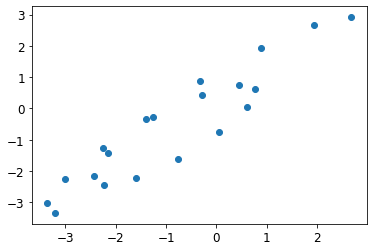

In [66]:
plt.scatter(X_batch.reshape(-1), y_batch.reshape(-1))

In [67]:
np.c_[X_batch[0], y_batch[0]]

array([[-3.20595327, -3.35749208],
       [-3.35749208, -3.00778814],
       [-3.00778814, -2.24671863],
       [-2.24671863, -1.2609335 ],
       [-1.2609335 , -0.28800016],
       [-0.28800016,  0.44187377],
       [ 0.44187377,  0.76226868],
       [ 0.76226868,  0.61131437],
       [ 0.61131437,  0.04680345],
       [ 0.04680345, -0.76804474],
       [-0.76804474, -1.60468427],
       [-1.60468427, -2.22538897],
       [-2.22538897, -2.44169719],
       [-2.44169719, -2.16084434],
       [-2.16084434, -1.40881262],
       [-1.40881262, -0.32435187],
       [-0.32435187,  0.87456805],
       [ 0.87456805,  1.94366343],
       [ 1.94366343,  2.67165289],
       [ 2.67165289,  2.93146558]])

## Using an `OuputProjectionWrapper`

Let's create the RNN. It will contain 100 recurrent neurons and we will unroll it over 20 time steps since each traiing instance will be 20 inputs long. Each input will contain only one feature (the value at that time). The targets are also sequences of 20 inputs, each containing a sigle value:

In [68]:
reset_graph()

n_steps = 20
n_inputs = 1
n_neurons = 100
n_outputs = 1

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu)
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

At each time step we now have an output vector of size 100. But what we actually want is a single output value at each time step. The simplest solution is to wrap the cell in an `OutputProjectionWrapper`.

In [69]:
reset_graph()

n_steps = 20
n_inputs = 1
n_neurons = 100
n_outputs = 1

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

In [70]:
cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu),
    output_size=n_outputs)

In [71]:
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

W0528 13:49:07.241532 140035565999936 deprecation.py:506] From /usr/local/anaconda/lib/python3.6/site-packages/tensorflow/contrib/rnn/python/ops/core_rnn_cell.py:104: calling Constant.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [72]:
learning_rate = 0.001

loss = tf.reduce_mean(tf.square(outputs - y)) # MSE
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

In [73]:
saver = tf.train.Saver()

In [74]:
n_iterations = 1500
batch_size = 50

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch, y_batch = next_batch(batch_size, n_steps)
        sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if iteration % 100 == 0:
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMSE:", mse)
    
    saver.save(sess, "model_ckps/my_time_series_model")

0 	MSE: 11.668163
100 	MSE: 0.45380798
200 	MSE: 0.13464852
300 	MSE: 0.0777895
400 	MSE: 0.05543721
500 	MSE: 0.045019057
600 	MSE: 0.057810567
700 	MSE: 0.046088092
800 	MSE: 0.048593957
900 	MSE: 0.04899169
1000 	MSE: 0.04499455
1100 	MSE: 0.038715813
1200 	MSE: 0.043568037
1300 	MSE: 0.053995047
1400 	MSE: 0.041413147


In [75]:
with tf.Session() as sess:                          
    saver.restore(sess, "model_ckps/my_time_series_model")

    X_new = time_series(np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
    y_pred = sess.run(outputs, feed_dict={X: X_new})
    print(y_pred)

W0528 13:49:19.524188 140035565999936 deprecation.py:323] From /usr/local/anaconda/lib/python3.6/site-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


[[[-3.1503463 ]
  [-2.2512622 ]
  [-0.87199914]
  [ 1.0051479 ]
  [ 2.3682053 ]
  [ 3.3614435 ]
  [ 3.6874983 ]
  [ 3.5624175 ]
  [ 3.100823  ]
  [ 2.4016635 ]
  [ 1.8510661 ]
  [ 1.7069335 ]
  [ 2.1726232 ]
  [ 3.0470247 ]
  [ 4.1942134 ]
  [ 5.3357854 ]
  [ 6.299635  ]
  [ 6.851912  ]
  [ 6.824697  ]
  [ 6.314696  ]]]


In [76]:
y_pred

array([[[-3.1503463 ],
        [-2.2512622 ],
        [-0.87199914],
        [ 1.0051479 ],
        [ 2.3682053 ],
        [ 3.3614435 ],
        [ 3.6874983 ],
        [ 3.5624175 ],
        [ 3.100823  ],
        [ 2.4016635 ],
        [ 1.8510661 ],
        [ 1.7069335 ],
        [ 2.1726232 ],
        [ 3.0470247 ],
        [ 4.1942134 ],
        [ 5.3357854 ],
        [ 6.299635  ],
        [ 6.851912  ],
        [ 6.824697  ],
        [ 6.314696  ]]], dtype=float32)

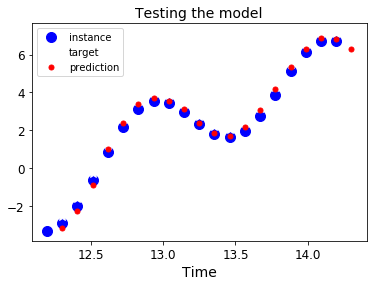

In [77]:
plt.title("Testing the model", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10, label="target")
plt.plot(t_instance[1:], y_pred[0,:,0], "r.", markersize=10, label="prediction")
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.show()

## Without using an `OutputProjectionWrapper`

In [78]:
reset_graph()

n_steps = 20
n_inputs = 1
n_neurons = 100

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

In [79]:
cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu)
rnn_outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

In [80]:
n_outputs = 1
learning_rate = 0.001

In [81]:
stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons])
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])

In [82]:
# _xtmp = tf.constant([
#     [
#         [1,2,3,4], 
#         [5, 6, 7, 8]
#     ], 
#     [
#         [10,20,30,40], 
#         [50, 60, 70, 80]
#     ], 
#     [
#         [100,200,130,140], 
#         [150, 160, 170, 180]
#     ]
# ])
# _ytmp = tf.reshape(_xtmp, [-1, 4])
# _ztmp = tf.reshape(_ytmp,[-1, 2, 4])
# with tf.Session() as s:
#     print(_ytmp.eval())
#     print("=======")
#     print(_ztmp.eval())

In [83]:
#outputs - 3D
#stacked_rnn_outputs - 2D

In [84]:
loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [85]:
# with tf.Session() as sess:
#     init.run()
#     X_batch, y_batch = next_batch(50, n_steps)
#     stacked_rnn_outputs_val = sess.run(stacked_rnn_outputs, feed_dict={X: X_batch, y: y_batch})

In [86]:
# rnn_outputs_val.shape

In [87]:
# stacked_rnn_outputs_val.shape

In [88]:
n_iterations = 1500
batch_size = 50

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch, y_batch = next_batch(batch_size, n_steps)
        sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if iteration % 100 == 0:
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMSE:", mse)
    
    X_new = time_series(np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
    y_pred = sess.run(outputs, feed_dict={X: X_new})
    
    saver.save(sess, "model_ckps/my_time_series_model")

0 	MSE: 13.727757
100 	MSE: 0.4547361
200 	MSE: 0.18710724
300 	MSE: 0.10744215
400 	MSE: 0.06513271
500 	MSE: 0.050453007
600 	MSE: 0.056549933
700 	MSE: 0.047109812
800 	MSE: 0.05084795
900 	MSE: 0.050821327
1000 	MSE: 0.04543768
1100 	MSE: 0.039838884
1200 	MSE: 0.045693014
1300 	MSE: 0.053158715
1400 	MSE: 0.042423554


In [89]:
y_pred

array([[[-3.18756   ],
        [-2.2522542 ],
        [-0.93408436],
        [ 0.97855836],
        [ 2.327299  ],
        [ 3.2557793 ],
        [ 3.7430735 ],
        [ 3.6084652 ],
        [ 3.0696373 ],
        [ 2.4322822 ],
        [ 1.9272566 ],
        [ 1.79623   ],
        [ 2.1473475 ],
        [ 2.975441  ],
        [ 4.113635  ],
        [ 5.320349  ],
        [ 6.3383393 ],
        [ 6.901812  ],
        [ 6.87087   ],
        [ 6.281694  ]]], dtype=float32)

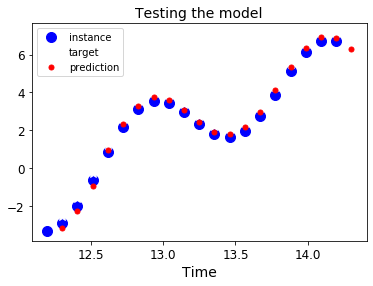

In [90]:
plt.title("Testing the model", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10, label="target")
plt.plot(t_instance[1:], y_pred[0,:,0], "r.", markersize=10, label="prediction")
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.show()

## Generating a creative new sequence

In [91]:
with tf.Session() as sess:                        
    saver.restore(sess, "model_ckps/my_time_series_model")
    sequence = [0.] * n_steps
    for iteration in range(300):
        X_batch = np.array(sequence[-n_steps:]).reshape(1, n_steps, 1)
        y_pred = sess.run(outputs, feed_dict={X: X_batch})
        sequence.append(y_pred[0, -1, 0])

In [92]:
sequence = [0.] * n_steps
np.array(sequence[-n_steps:]).reshape(-1)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [93]:
# plt.figure(figsize=(8,4))
# plt.plot(np.arange(len(sequence)), sequence, "b-")
# plt.plot(t[:n_steps], sequence[:n_steps], "b-", linewidth=3)
# plt.xlabel("Time")
# plt.ylabel("Value")
# plt.show()

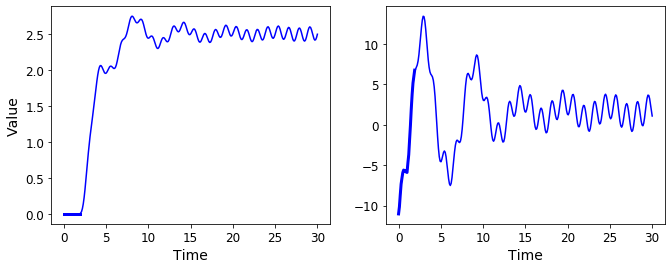

In [94]:
with tf.Session() as sess:
    saver.restore(sess, "model_ckps/my_time_series_model")

    sequence1 = [0. for i in range(n_steps)]
    for iteration in range(len(t) - n_steps):
        X_batch = np.array(sequence1[-n_steps:]).reshape(1, n_steps, 1)
        y_pred = sess.run(outputs, feed_dict={X: X_batch})
        sequence1.append(y_pred[0, -1, 0])

    sequence2 = [time_series(i * resolution + t_min + (t_max-t_min/3)) for i in range(n_steps)]
    for iteration in range(len(t) - n_steps):
        X_batch = np.array(sequence2[-n_steps:]).reshape(1, n_steps, 1)
        y_pred = sess.run(outputs, feed_dict={X: X_batch})
        sequence2.append(y_pred[0, -1, 0])

plt.figure(figsize=(11,4))
plt.subplot(121)
plt.plot(t, sequence1, "b-")
plt.plot(t[:n_steps], sequence1[:n_steps], "b-", linewidth=3)
plt.xlabel("Time")
plt.ylabel("Value")

plt.subplot(122)
plt.plot(t, sequence2, "b-")
plt.plot(t[:n_steps], sequence2[:n_steps], "b-", linewidth=3)
plt.xlabel("Time")
plt.show()

# Deep RNN

## MultiRNNCell

In [95]:
reset_graph()

n_inputs = 2
n_steps = 5

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])

In [96]:
n_neurons = 100
n_layers = 3

layers = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
          for layer in range(n_layers)]
multi_layer_cell = tf.contrib.rnn.MultiRNNCell(layers, state_is_tuple=True)
outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

In [97]:
init = tf.global_variables_initializer()

In [98]:
X_batch = np.random.rand(2, n_steps, n_inputs)

In [99]:
X_batch.shape

(2, 5, 2)

In [100]:
with tf.Session() as sess:
    init.run()
    outputs_val, states_val = sess.run([outputs, states], feed_dict={X: X_batch})

In [101]:
outputs_val.shape

(2, 5, 100)

In [102]:
states_val[0].shape

(2, 100)

In [103]:
states_val[1].shape

(2, 100)

In [104]:
states_val[1].shape

(2, 100)

## Dropout

In [105]:
reset_graph()

n_inputs = 1
n_neurons = 100
n_layers = 3
n_steps = 20
n_outputs = 1

In [106]:
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

Note: the `input_keep_prob` parameter can be a placeholder, making it possible to set it to any value you want during training, and to 1.0 during testing (effectively turning dropout off). This is a much more elegant solution than what was recommended in earlier versions of the book (i.e., writing your own wrapper class or having a separate model for training and testing). Thanks to Shen Cheng for bringing this to my attention.

In [107]:
keep_prob = tf.placeholder_with_default(1.0, shape=())
cells = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
         for layer in range(n_layers)]
cells_drop = [tf.contrib.rnn.DropoutWrapper(cell, input_keep_prob=keep_prob)
              for cell in cells]
multi_layer_cell = tf.contrib.rnn.MultiRNNCell(cells_drop)
rnn_outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

In [108]:
learning_rate = 0.01

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons])
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])

loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [109]:
n_iterations = 5000
batch_size = 50
train_keep_prob = 0.5

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch, y_batch = next_batch(batch_size, n_steps)
        _, mse = sess.run([training_op, loss],
                          feed_dict={X: X_batch, y: y_batch,
                                     keep_prob: train_keep_prob})
        if iteration % 100 == 0:                   # not shown in the book
            print(iteration, "Training MSE:", mse) # not shown
    
    saver.save(sess, "model_ckps/my_dropout_time_series_model")

0 Training MSE: 15.023706
100 Training MSE: 5.298618
200 Training MSE: 4.705078
300 Training MSE: 4.1328983
400 Training MSE: 3.7647734
500 Training MSE: 3.337942
600 Training MSE: 3.7617779
700 Training MSE: 4.6290555
800 Training MSE: 3.8422308
900 Training MSE: 3.2594054
1000 Training MSE: 3.922646
1100 Training MSE: 3.71681
1200 Training MSE: 3.642402
1300 Training MSE: 3.5209708
1400 Training MSE: 3.0193927
1500 Training MSE: 3.530805
1600 Training MSE: 3.1247845
1700 Training MSE: 4.8754272
1800 Training MSE: 5.7726274
1900 Training MSE: 5.4532456
2000 Training MSE: 6.504659
2100 Training MSE: 4.4858036
2200 Training MSE: 4.7281075
2300 Training MSE: 6.3124814
2400 Training MSE: 5.649613
2500 Training MSE: 5.807761
2600 Training MSE: 5.400741
2700 Training MSE: 6.7195234
2800 Training MSE: 6.3512263
2900 Training MSE: 5.4077954
3000 Training MSE: 5.821694
3100 Training MSE: 5.729141
3200 Training MSE: 5.9725757
3300 Training MSE: 5.8858466
3400 Training MSE: 5.959841
3500 Trainin

In [110]:
with tf.Session() as sess:
    saver.restore(sess, "model_ckps/my_dropout_time_series_model")

    X_new = time_series(np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
    y_pred = sess.run(outputs, feed_dict={X: X_new})

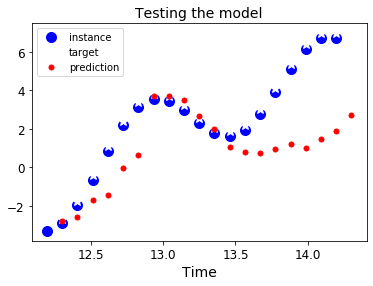

In [111]:
plt.title("Testing the model", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10, label="target")
plt.plot(t_instance[1:], y_pred[0,:,0], "r.", markersize=10, label="prediction")
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.show()

Oops, it seems that Dropout does not help at all in this particular case. :/

# LSTM

In [112]:
reset_graph()

lstm_cell = tf.contrib.rnn.BasicLSTMCell(num_units=n_neurons)

W0528 13:50:48.351994 140035565999936 deprecation.py:323] From <ipython-input-112-858b095e28bf>:3: BasicLSTMCell.__init__ (from tensorflow.python.ops.rnn_cell_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.


In [113]:
n_steps = 28
n_inputs = 28
n_neurons = 150
n_outputs = 10
n_layers = 3

learning_rate = 0.001

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])

lstm_cells = [tf.contrib.rnn.BasicLSTMCell(num_units=n_neurons)
              for layer in range(n_layers)]
multi_cell = tf.contrib.rnn.MultiRNNCell(lstm_cells)
outputs, states = tf.nn.dynamic_rnn(multi_cell, X, dtype=tf.float32)
top_layer_h_state = states[-1][1]
logits = tf.layers.dense(top_layer_h_state, n_outputs, name="softmax")
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy, name="loss")
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
init = tf.global_variables_initializer()

In [114]:
states

(LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_3:0' shape=(?, 150) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_4:0' shape=(?, 150) dtype=float32>),
 LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_5:0' shape=(?, 150) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_6:0' shape=(?, 150) dtype=float32>),
 LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_7:0' shape=(?, 150) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_8:0' shape=(?, 150) dtype=float32>))

In [115]:
top_layer_h_state

<tf.Tensor 'rnn/while/Exit_8:0' shape=(?, 150) dtype=float32>

In [116]:
n_epochs = 10
batch_size = 150

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            X_batch = X_batch.reshape((batch_size, n_steps, n_inputs))
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
        print("Epoch", epoch, "Train accuracy =", acc_train, "Test accuracy =", acc_test)

Epoch 0 Train accuracy = 0.94666666 Test accuracy = 0.9492
Epoch 1 Train accuracy = 0.9866667 Test accuracy = 0.9694
Epoch 2 Train accuracy = 0.9866667 Test accuracy = 0.9742
Epoch 3 Train accuracy = 0.99333334 Test accuracy = 0.9816
Epoch 4 Train accuracy = 0.99333334 Test accuracy = 0.9785
Epoch 5 Train accuracy = 0.98 Test accuracy = 0.9837
Epoch 6 Train accuracy = 1.0 Test accuracy = 0.9871
Epoch 7 Train accuracy = 0.98 Test accuracy = 0.9846
Epoch 8 Train accuracy = 0.9866667 Test accuracy = 0.9879
Epoch 9 Train accuracy = 1.0 Test accuracy = 0.9854


In [117]:
lstm_cell = tf.contrib.rnn.LSTMCell(num_units=n_neurons, use_peepholes=True)

W0528 13:55:57.980590 140035565999936 deprecation.py:323] From <ipython-input-117-f368bbc8fe51>:1: LSTMCell.__init__ (from tensorflow.python.ops.rnn_cell_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.


In [118]:
gru_cell = tf.contrib.rnn.GRUCell(num_units=n_neurons)

W0528 13:55:58.027124 140035565999936 deprecation.py:323] From <ipython-input-118-e122be3b374a>:1: GRUCell.__init__ (from tensorflow.python.ops.rnn_cell_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This class is equivalent as tf.keras.layers.GRUCell, and will be replaced by that in Tensorflow 2.0.


# Embeddings

This section is based on TensorFlow's [Word2Vec tutorial](https://www.tensorflow.org/versions/r0.11/tutorials/word2vec/index.html).

Also See: https://www.tensorflow.org/tutorials/word2vec#motivation_why_learn_word_embeddings

In [119]:
## Gensim is a library that lets you build word2vec
from gensim.models import KeyedVectors
# load the google word2vec model
filename = '/cxldata/embedding/word2vec/GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True)
# calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

ModuleNotFoundError: No module named 'google_compute_engine'

```
## Gensim is a library that lets you build word2vec
from gensim.models import KeyedVectors
# load the google word2vec model
filename = '/cxldata/embedding/word2vec/GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True)
# calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

```

In [120]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

NameError: name 'model' is not defined

## Fetch the data

In [125]:
from six.moves import urllib

import errno
import os
import zipfile

WORDS_PATH = "datasets/words"
WORDS_URL = 'http://mattmahoney.net/dc/text8.zip'

def mkdir_p(path):
    """Create directories, ok if they already exist.
    
    This is for python 2 support. In python >=3.2, simply use:
    >>> os.makedirs(path, exist_ok=True)
    """
    try:
        os.makedirs(path)
    except OSError as exc:
        if exc.errno == errno.EEXIST and os.path.isdir(path):
            pass
        else:
            raise

def fetch_words_data(words_url=WORDS_URL, words_path=WORDS_PATH):
    os.makedirs(words_path, exist_ok=True)
    zip_path = os.path.join(words_path, "words.zip")
    if not os.path.exists(zip_path):
        urllib.request.urlretrieve(words_url, zip_path)
    with zipfile.ZipFile(zip_path) as f:
        data = f.read(f.namelist()[0])
    return data.decode("ascii").split()

In [126]:
words = fetch_words_data()

In [127]:
words

['anarchism',
 'originated',
 'as',
 'a',
 'term',
 'of',
 'abuse',
 'first',
 'used',
 'against',
 'early',
 'working',
 'class',
 'radicals',
 'including',
 'the',
 'diggers',
 'of',
 'the',
 'english',
 'revolution',
 'and',
 'the',
 'sans',
 'culottes',
 'of',
 'the',
 'french',
 'revolution',
 'whilst',
 'the',
 'term',
 'is',
 'still',
 'used',
 'in',
 'a',
 'pejorative',
 'way',
 'to',
 'describe',
 'any',
 'act',
 'that',
 'used',
 'violent',
 'means',
 'to',
 'destroy',
 'the',
 'organization',
 'of',
 'society',
 'it',
 'has',
 'also',
 'been',
 'taken',
 'up',
 'as',
 'a',
 'positive',
 'label',
 'by',
 'self',
 'defined',
 'anarchists',
 'the',
 'word',
 'anarchism',
 'is',
 'derived',
 'from',
 'the',
 'greek',
 'without',
 'archons',
 'ruler',
 'chief',
 'king',
 'anarchism',
 'as',
 'a',
 'political',
 'philosophy',
 'is',
 'the',
 'belief',
 'that',
 'rulers',
 'are',
 'unnecessary',
 'and',
 'should',
 'be',
 'abolished',
 'although',
 'there',
 'are',
 'differing',
 '

## Build the dictionary

In [128]:
# Understand enumerate
# Enumerate gives us the index of iteration
[(a, b) for a,b in enumerate([100,200, 300])]

[(0, 100), (1, 200), (2, 300)]

In [129]:
from collections import Counter

vocabulary_size = 50000

# Find the counts of words - ordered by counts
vocabulary = [("UNK", None)] + Counter(words).most_common(vocabulary_size - 1)
print(vocabulary[:10])
print("=====")

# Pick only word
vocabulary = np.array([word for word, _ in vocabulary])
print(vocabulary[:10])
print("=====")

dictionary = {word: order for order, word in enumerate(vocabulary)}
data = np.array([dictionary.get(word, 0) for word in words])
print(data[:10])

[('UNK', None), ('the', 1061396), ('of', 593677), ('and', 416629), ('one', 411764), ('in', 372201), ('a', 325873), ('to', 316376), ('zero', 264975), ('nine', 250430)]
=====
['UNK' 'the' 'of' 'and' 'one' 'in' 'a' 'to' 'zero' 'nine']
=====
[5234 3081   12    6  195    2 3134   46   59  156]


In [130]:
list(zip(words[:20], data[:20]))

[('anarchism', 5234),
 ('originated', 3081),
 ('as', 12),
 ('a', 6),
 ('term', 195),
 ('of', 2),
 ('abuse', 3134),
 ('first', 46),
 ('used', 59),
 ('against', 156),
 ('early', 128),
 ('working', 742),
 ('class', 477),
 ('radicals', 10572),
 ('including', 134),
 ('the', 1),
 ('diggers', 27350),
 ('of', 2),
 ('the', 1),
 ('english', 103)]

In [131]:
" ".join([vocabulary[word_index] for word_index in [5241, 3081, 12, 6, 195, 2, 3134, 46, 59]])

'cycles originated as a term of abuse first used'

In [132]:
words[24], data[24]

('culottes', 0)

In [133]:
data[:24]

array([ 5234,  3081,    12,     6,   195,     2,  3134,    46,    59,
         156,   128,   742,   477, 10572,   134,     1, 27350,     2,
           1,   103,   855,     3,     1, 15068])

## Generate batches

In [134]:
import random
from collections import deque

def generate_batch(batch_size, num_skips, skip_window):
    global data_index
    assert batch_size % num_skips == 0
    assert num_skips <= 2 * skip_window
    batch = np.ndarray(shape=(batch_size), dtype=np.int32)
    labels = np.ndarray(shape=(batch_size, 1), dtype=np.int32)
    span = 2 * skip_window + 1 # [ skip_window target skip_window ]
    buffer = deque(maxlen=span)
    for _ in range(span):
        buffer.append(data[data_index])
        data_index = (data_index + 1) % len(data)
    for i in range(batch_size // num_skips):
        target = skip_window  # target label at the center of the buffer
        targets_to_avoid = [ skip_window ]
        for j in range(num_skips):
            while target in targets_to_avoid:
                target = random.randint(0, span - 1)
            targets_to_avoid.append(target)
            batch[i * num_skips + j] = buffer[skip_window]
            labels[i * num_skips + j, 0] = buffer[target]
        buffer.append(data[data_index])
        data_index = (data_index + 1) % len(data)
    return batch, labels

In [135]:
data_index=0
batch, labels = generate_batch(5, 1, 1)

In [136]:
batch

array([3081,   12,    6,  195,    2], dtype=int32)

In [137]:
labels

array([[5234],
       [3081],
       [ 195],
       [   2],
       [3134]], dtype=int32)

In [138]:
batch, [vocabulary[word] for word in batch]

(array([3081,   12,    6,  195,    2], dtype=int32),
 ['originated', 'as', 'a', 'term', 'of'])

In [139]:
labels, [vocabulary[word] for word in labels[:, 0]]

(array([[5234],
        [3081],
        [ 195],
        [   2],
        [3134]], dtype=int32),
 ['anarchism', 'originated', 'term', 'of', 'abuse'])

## Build the model

In [140]:
batch_size = 128
embedding_size = 128  # Dimension of the embedding vector.
skip_window = 1       # How many words to consider left and right.
num_skips = 2         # How many times to reuse an input to generate a label.

# We pick a random validation set to sample nearest neighbors. Here we limit the
# validation samples to the words that have a low numeric ID, which by
# construction are also the most frequent.
valid_size = 16     # Random set of words to evaluate similarity on.
valid_window = 100  # Only pick dev samples in the head of the distribution.
valid_examples = np.random.choice(valid_window, valid_size, replace=False)
num_sampled = 64    # Number of negative examples to sample.

learning_rate = 0.01

In [141]:
reset_graph()

# Input data.
train_labels = tf.placeholder(tf.int32, shape=[batch_size, 1])
valid_dataset = tf.constant(valid_examples, dtype=tf.int32)

In [142]:
vocabulary_size = 50000
embedding_size = 150

# Look up embeddings for inputs.
init_embeds = tf.random_uniform([vocabulary_size, embedding_size], -1.0, 1.0)
embeddings = tf.Variable(init_embeds)

In [143]:
train_inputs = tf.placeholder(tf.int32, shape=[None])
embed = tf.nn.embedding_lookup(embeddings, train_inputs)

In [144]:
# Construct the variables for the NCE loss
nce_weights = tf.Variable(
    tf.truncated_normal([vocabulary_size, embedding_size],
                        stddev=1.0 / np.sqrt(embedding_size)))
nce_biases = tf.Variable(tf.zeros([vocabulary_size]))

# Compute the average NCE loss for the batch.
# tf.nce_loss automatically draws a new sample of the negative labels each
# time we evaluate the loss.
# See https://www.tensorflow.org/tutorials/word2vec#scaling_up_with_noise-contrastive_training
loss = tf.reduce_mean(
    tf.nn.nce_loss(nce_weights, nce_biases, train_labels, embed,
                   num_sampled, vocabulary_size))

# Construct the Adam optimizer
optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(loss)

# Compute the cosine similarity between minibatch examples 
#and all embeddings.
norm = tf.sqrt(tf.reduce_sum(tf.square(embeddings), axis=1, keep_dims=True))
normalized_embeddings = embeddings / norm
valid_embeddings = tf.nn.embedding_lookup(normalized_embeddings, valid_dataset)
similarity = tf.matmul(valid_embeddings, normalized_embeddings, transpose_b=True)

# Add variable initializer.
init = tf.global_variables_initializer()

W0528 13:57:14.754145 140035565999936 deprecation.py:506] From <ipython-input-144-a6e4c466f64b>:21: calling reduce_sum_v1 (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


## Train the model

In [145]:
num_steps = 500

with tf.Session() as session:
    init.run()

    average_loss = 0
    for step in range(num_steps):
        print("\rIteration: {}".format(step), end="\t")
        batch_inputs, batch_labels = generate_batch(batch_size, num_skips, skip_window)
        feed_dict = {train_inputs : batch_inputs, train_labels : batch_labels}

        # We perform one update step by evaluating the training op (including it
        # in the list of returned values for session.run()
        _, loss_val = session.run([training_op, loss], feed_dict=feed_dict)
        average_loss += loss_val

        if step % 2000 == 0:
            if step > 0:
                average_loss /= 2000
            # The average loss is an estimate of the loss over the last 2000 batches.
            print("Average loss at step ", step, ": ", average_loss)
            average_loss = 0

        # Note that this is expensive (~20% slowdown if computed every 500 steps)
        if step % 10000 == 0:
            sim = similarity.eval()
            for i in range(valid_size):
                valid_word = vocabulary[valid_examples[i]]
                top_k = 8 # number of nearest neighbors
                nearest = (-sim[i, :]).argsort()[1:top_k+1]
                log_str = "Nearest to %s:" % valid_word
                for k in range(top_k):
                    close_word = vocabulary[nearest[k]]
                    log_str = "%s %s," % (log_str, close_word)
                print(log_str)

    final_embeddings = normalized_embeddings.eval()

Iteration: 0	Average loss at step  0 :  290.0802001953125
Nearest to would: viewpoint, lured, rossini, vara, teflon, glaciation, losing, eurasia,
Nearest to on: thatched, falsely, wi, vinegar, euskal, consequentialist, baroness, tallinn,
Nearest to four: hom, rez, siege, translators, khalil, pegged, hellene, ynys,
Nearest to his: pointers, ponty, charged, achieved, rk, blooming, value, juggernaut,
Nearest to often: presses, convenience, arabidopsis, jewry, mapuche, guts, macrinus, implemented,
Nearest to in: furnishing, qi, renderer, tuning, mckenna, illustrate, advances, parser,
Nearest to an: gutierrez, dyess, privations, archaeological, bijection, kon, joh, insemination,
Nearest to eight: malacca, liquidation, davidic, comical, ochre, wild, redman, unconditional,
Nearest to these: pedro, condoned, neck, ssn, supervising, doug, thereto, melton,
Nearest to nine: cocker, struck, dame, tensile, unifies, operetta, develop, opinions,
Nearest to called: paradoxes, wings, krantz, consults, 

Let's save the final embeddings (of course you can use a TensorFlow `Saver` if you prefer):

In [146]:
np.save("./my_final_embeddings.npy", final_embeddings)

## Plot the embeddings

In [147]:
final_embeddings.shape

(50000, 150)

In [148]:
def plot_with_labels(low_dim_embs, labels):
    assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
    plt.figure(figsize=(18, 18))  #in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i,:]
        plt.scatter(x, y)
        plt.annotate(label,
                     xy=(x, y),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

t-distributed Stochastic Neighbor Embedding.

t-SNE [1] is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results.

http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [149]:
data[:20]

array([ 5234,  3081,    12,     6,   195,     2,  3134,    46,    59,
         156,   128,   742,   477, 10572,   134,     1, 27350,     2,
           1,   103])

In [150]:
words[:20]

['anarchism',
 'originated',
 'as',
 'a',
 'term',
 'of',
 'abuse',
 'first',
 'used',
 'against',
 'early',
 'working',
 'class',
 'radicals',
 'including',
 'the',
 'diggers',
 'of',
 'the',
 'english']

In [151]:
a = final_embeddings[6]
the = final_embeddings[2]
english = final_embeddings[103]

In [152]:
def unitv(a):
    return a/np.sqrt(sum(a*a))
def cs(a, b):
    return unitv(a).dot(unitv(b))

In [153]:
cs(the, english)

0.25636494

In [154]:
cs(the, a)

0.4116176

In [155]:
cs(a, english)

0.39885312

In [156]:
#final_embeddings = np.array([[]])
#np.load("./my_final_embeddings.npy", final_embeddings)

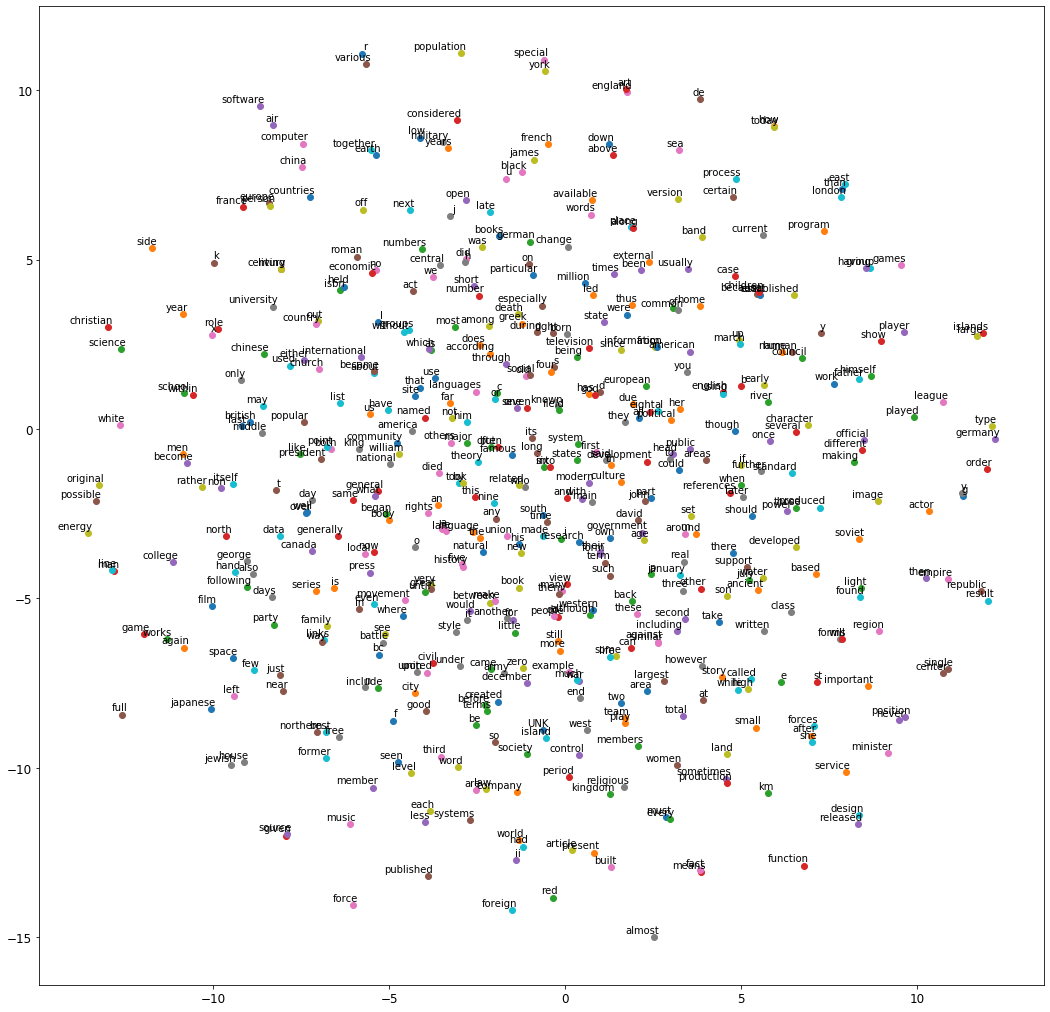

In [157]:
from sklearn.manifold import TSNE

tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
plot_only = 500
low_dim_embs = tsne.fit_transform(final_embeddings[:plot_only,:])
labels = [vocabulary[i] for i in range(plot_only)]
plot_with_labels(low_dim_embs, labels)

In [158]:
final_embeddings[0].shape

(150,)

# Machine Translation

See: https://www.tensorflow.org/tutorials/seq2seq

The `basic_rnn_seq2seq()` function creates a simple Encoder/Decoder model: it first runs an RNN to encode `encoder_inputs` into a state vector, then runs a decoder initialized with the last encoder state on `decoder_inputs`. Encoder and decoder use the same RNN cell type but they don't share parameters.

In [159]:
import tensorflow as tf
reset_graph()

n_steps = 50
n_neurons = 200
n_layers = 3
num_encoder_symbols = 20000
num_decoder_symbols = 20000
embedding_size = 150
learning_rate = 0.01

X = tf.placeholder(tf.int32, [None, n_steps]) # English sentences
Y = tf.placeholder(tf.int32, [None, n_steps]) # French translations
W = tf.placeholder(tf.float32, [None, n_steps - 1, 1])
Y_input = Y[:, :-1]
Y_target = Y[:, 1:]

encoder_inputs = tf.unstack(tf.transpose(X)) # list of 1D tensors
decoder_inputs = tf.unstack(tf.transpose(Y_input)) # list of 1D tensors

lstm_cells = [tf.contrib.rnn.BasicLSTMCell(num_units=n_neurons)
              for layer in range(n_layers)]
cell = tf.contrib.rnn.MultiRNNCell(lstm_cells)

output_seqs, states = tf.contrib.legacy_seq2seq.embedding_rnn_seq2seq(
    encoder_inputs,
    decoder_inputs,
    cell,
    num_encoder_symbols,
    num_decoder_symbols,
    embedding_size)

logits = tf.transpose(tf.unstack(output_seqs), perm=[1, 0, 2])

In [160]:
logits_flat = tf.reshape(logits, [-1, num_decoder_symbols])
Y_target_flat = tf.reshape(Y_target, [-1])
W_flat = tf.reshape(W, [-1])
xentropy = W_flat * tf.nn.sparse_softmax_cross_entropy_with_logits(labels=Y_target_flat, logits=logits_flat)
loss = tf.reduce_mean(xentropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

In [161]:
# Create session
# Feed Enlish and fresh sentences
# ...
# TODO: Downlod TED Talk data and try